# **Data Mining Final Project**
# PART 3:  Credit Card Fraud Detection: Outlier Detection



# **Introduction:**
# This notebook is dedicated to advanced data analysis for credit card fraud detection.
## The main steps include:
## 1. Outlier detection






#Key objectives:
## 1. identify and handle outliers in the data
## 2. Build a fraud detection model using two different algorithms
## 3. In-depth analysis of model performance and feature importance

In [ ]:
## Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import machine learning library

In [ ]:
# Machine Learning libraries
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_curve,
    auc,
    precision_recall_curve,
    average_precision_score
)


#     Upload and load data file in Google Colab .


In [ ]:
from google.colab import files
import pandas as pd

def upload_and_load_data():
    """
    Upload CSV file in Google Colab environment.

    Returns:
    --------
    pandas.DataFrame
        Uploaded dataset
    """
    print("Please upload the SMOTE-processed CSV file")
    print("Click the 'Choose Files' button below to upload")

    # Upload file
    uploaded = files.upload()

    # Get the filename
    filename = list(uploaded.keys())[0]

    # Read CSV file
    data = pd.read_csv(filename)

    print(f"Successfully uploaded file: {filename}")
    print(f"Dataset shape: {data.shape}")

    return data


data = upload_and_load_data()



Please upload the SMOTE-processed CSV file
Click the 'Choose Files' button below to upload


Saving smote_processed_data.csv to smote_processed_data.csv
Successfully uploaded file: smote_processed_data.csv
Dataset shape: (363922, 30)


#     Detect outliers using Isolation Forest algorithm.


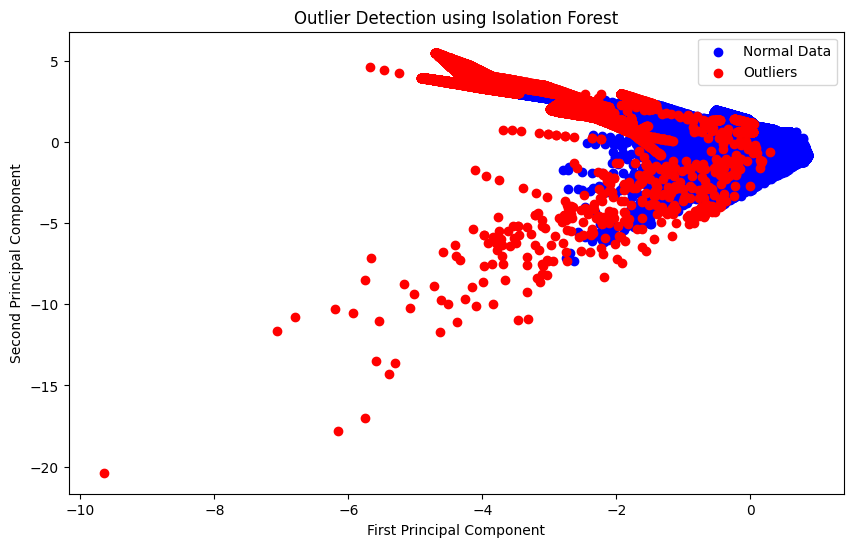

Total samples: 363922
Detected outliers: 18123 (4.98%)


In [ ]:
def detect_outliers(X, contamination=0.05):

    # Standardize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Isolation Forest for outlier detection
    iso_forest = IsolationForest(
        contamination=contamination,
        random_state=42,
        max_samples='auto'
    )
    outlier_labels = iso_forest.fit_predict(X_scaled)

    # Separate outliers and normal data
    outliers = X[outlier_labels == -1]
    normal_data = X[outlier_labels == 1]

    # Visualization of outlier detection
    plt.figure(figsize=(10, 6))
    plt.scatter(
        X_scaled[outlier_labels == 1, 0],
        X_scaled[outlier_labels == 1, 1],
        c='blue',
        label='Normal Data'
    )
    plt.scatter(
        X_scaled[outlier_labels == -1, 0],
        X_scaled[outlier_labels == -1, 1],
        c='red',
        label='Outliers'
    )
    plt.title('Outlier Detection using Isolation Forest')
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.legend()
    plt.show()

    # Print outlier statistics
    print(f"Total samples: {len(X)}")
    print(f"Detected outliers: {len(outliers)} ({len(outliers)/len(X)*100:.2f}%)")

    return normal_data, outliers

#display result
X = data.drop('Class', axis=1)
X_normal, X_outliers = detect_outliers(X)